<a href="https://colab.research.google.com/github/ranaelayeb/ranaelayeb/blob/main/hupipojet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import pandas as pd
import seaborn as sns

In [3]:
os.listdir("/content/drive/MyDrive/projethupi/")

['data_technicien.csv']

In [4]:

data = pd.read_csv('/content/drive/MyDrive/projethupi/data_technicien.csv')

In [5]:
data.head(250)

,Scenario,Correct,Timestamp,Datetime,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,t2_casque,t2_visiere,t2_veste,t2_col,danger
0,1,1,1626949343,2021-07-22 10:22:23,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
1,1,1,1626949359,2021-07-22 10:22:39,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
2,1,1,1626949374,2021-07-22 10:22:54,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
3,1,1,1626949389,2021-07-22 10:23:09,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
4,1,1,1626949405,2021-07-22 10:23:25,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1,1,1626085853,2021-07-12 10:30:53,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0
246,1,1,1626085878,2021-07-12 10:31:18,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0
247,1,1,1626085904,2021-07-12 10:31:44,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0
248,1,0,1626087111,2021-07-12 10:51:51,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0


In [6]:
# some settings for graphics
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,4)})

In [7]:
data.describe()

,Scenario,Correct,Timestamp,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,t2_casque,t2_visiere,t2_veste,t2_col,danger
count,393.000000,393.000000,3.930000e+02,225.000000,225.000000,225.000000,225.000000,225.000000,168.000000,168.000000,168.000000,168.000000,393.000000
mean,2.167939,0.585242,1.626536e+09,0.822222,0.120000,0.115556,0.253333,0.240000,0.601190,0.279762,0.392857,0.541667,0.152672
std,1.424025,0.493308,4.321996e+05,0.383178,0.325686,0.320404,0.435890,0.428035,0.491117,0.450224,0.489846,0.499750,0.360129
min,1.000000,0.000000,1.626085e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.626088e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.626949e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,1.626951e+09,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,6.000000,1.000000,1.626966e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Scenario        393 non-null    int64  
 1   Correct         393 non-null    int64  
 2   Timestamp       393 non-null    int64  
 3   Datetime        393 non-null    object 
 4   t1_casque       225 non-null    float64
 5   t1_visiere      225 non-null    float64
 6   t1_col          225 non-null    float64
 7   t1_gant_gauche  225 non-null    float64
 8   t1_gant_droit   225 non-null    float64
 9   t2_casque       168 non-null    float64
 10  t2_visiere      168 non-null    float64
 11  t2_veste        168 non-null    float64
 12  t2_col          168 non-null    float64
 13  danger          393 non-null    int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 43.1+ KB


In [9]:
df = pd.DataFrame(data)
#Get the number of rows and columns using the shape attribute
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 393
Number of columns: 14


In [10]:
import pandas as pd


# Créez un dataframe pour le technicien 1
df1 = df[['Scenario', 'Correct', 'Timestamp', 'Datetime', 't1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit', 'danger']].copy()

# Créez un dataframe pour le technicien 2
df2 = df[['Scenario', 'Correct', 'Timestamp', 'Datetime', 't2_casque', 't2_visiere', 't2_veste', 't2_col', 'danger']].copy()

# Affichez les premières lignes des nouveaux dataframes
print("Technicien 1:")
print(df1.head())

print("\nTechnicien 2:")
print(df2.head())


Technicien 1:
   Scenario  Correct   Timestamp             Datetime  t1_casque  t1_visiere  \
0         1        1  1626949343  2021-07-22 10:22:23        0.0         0.0   
1         1        1  1626949359  2021-07-22 10:22:39        0.0         0.0   
2         1        1  1626949374  2021-07-22 10:22:54        0.0         0.0   
3         1        1  1626949389  2021-07-22 10:23:09        0.0         0.0   
4         1        1  1626949405  2021-07-22 10:23:25        0.0         0.0   

   t1_col  t1_gant_gauche  t1_gant_droit  danger  
0     0.0             0.0            0.0       0  
1     0.0             0.0            0.0       0  
2     0.0             0.0            0.0       0  
3     0.0             0.0            0.0       0  
4     0.0             0.0            0.0       0  

Technicien 2:
   Scenario  Correct   Timestamp             Datetime  t2_casque  t2_visiere  \
0         1        1  1626949343  2021-07-22 10:22:23        NaN         NaN   
1         1        1  16

In [11]:
import pandas as pd

# Supposons que votre dataframe s'appelle df
# Créez un dataframe pour le technicien 1
#df1 = df[['Scenario', 'Correct', 'Timestamp', 'Datetime', 't1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit', 'danger']].copy()

# Créez un dataframe pour le technicien 2
#df2 = df[['Scenario', 'Correct', 'Timestamp', 'Datetime', 't2_casque', 't2_visiere', 't2_veste', 't2_col', 'danger']].copy()

# Ajoutez une variable 'duree_etat' pour le technicien 1
#df1['duree_etat'] = (df1.groupby(['Scenario', 't1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit'])
                    # ['Timestamp'].diff().fillna(pd.Timedelta(seconds=0)))

# Ajoutez une variable 'duree_etat' pour le technicien 2
#df2['duree_etat'] = (df2.groupby(['Scenario', 't2_casque', 't2_visiere', 't2_veste', 't2_col'])
                    # ['Timestamp'].diff().fillna(pd.Timedelta(seconds=0)))

# Affichez les premières lignes des nouveaux dataframes
print("Technicien 1:")
print(df1.head(20))

print("\nTechnicien 2:")
print(df2.head(20))


Technicien 1:
    Scenario  Correct   Timestamp             Datetime  t1_casque  t1_visiere  \
0          1        1  1626949343  2021-07-22 10:22:23        0.0         0.0   
1          1        1  1626949359  2021-07-22 10:22:39        0.0         0.0   
2          1        1  1626949374  2021-07-22 10:22:54        0.0         0.0   
3          1        1  1626949389  2021-07-22 10:23:09        0.0         0.0   
4          1        1  1626949405  2021-07-22 10:23:25        0.0         0.0   
5          1        1  1626949420  2021-07-22 10:23:40        1.0         0.0   
6          1        1  1626949436  2021-07-22 10:23:56        1.0         0.0   
7          1        1  1626949451  2021-07-22 10:24:11        1.0         0.0   
8          1        1  1626949466  2021-07-22 10:24:26        1.0         0.0   
9          1        1  1626949482  2021-07-22 10:24:42        1.0         0.0   
10         1        1  1626949497  2021-07-22 10:24:57        1.0         0.0   
11         1  

Dans ce code, la fonction groupby est utilisée pour regrouper les observations en fonction de l'état des équipements pour chaque technicien et chaque scénario. Ensuite, la fonction diff() est utilisée pour calculer la différence temporelle entre les observations consécutives, donnant ainsi la durée passée dans le même état. La méthode fillna est utilisée pour remplir les valeurs manquantes avec 0 pour la première observation de chaque groupe.








Traitement des valeurs catégoriques :

In [12]:
df = pd.get_dummies(df, columns=['Datetime'])




**technicien 1**

In [13]:

features_num1 = df1.columns[df1.dtypes != object].tolist()
features_cat1 = df1.columns[df1.dtypes == object].tolist()

print(f'Numerical features for Technicien 1: {features_num1}')
print(f'Categorical features for Technicien 1: {features_cat1}')
#df1 = df1.dropna()


Numerical features for Technicien 1: ['Scenario', 'Correct', 'Timestamp', 't1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit', 'danger']
Categorical features for Technicien 1: ['Datetime']


In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

timestamp_values = df1['Timestamp'].values.reshape(-1, 1)

# Normalisation Min-Max
scaler = MinMaxScaler()
timestamp_normalized = scaler.fit_transform(timestamp_values)

# Remplacez les valeurs d'origine par les valeurs normalisées dans le DataFrame
df1['Timestamp'] = timestamp_normalized

# Examinez les résultats
print(df1.head())


   Scenario  Correct  Timestamp             Datetime  t1_casque  t1_visiere  \
0         1        1   0.981346  2021-07-22 10:22:23        0.0         0.0   
1         1        1   0.981365  2021-07-22 10:22:39        0.0         0.0   
2         1        1   0.981382  2021-07-22 10:22:54        0.0         0.0   
3         1        1   0.981399  2021-07-22 10:23:09        0.0         0.0   
4         1        1   0.981417  2021-07-22 10:23:25        0.0         0.0   

   t1_col  t1_gant_gauche  t1_gant_droit  danger  
0     0.0             0.0            0.0       0  
1     0.0             0.0            0.0       0  
2     0.0             0.0            0.0       0  
3     0.0             0.0            0.0       0  
4     0.0             0.0            0.0       0  


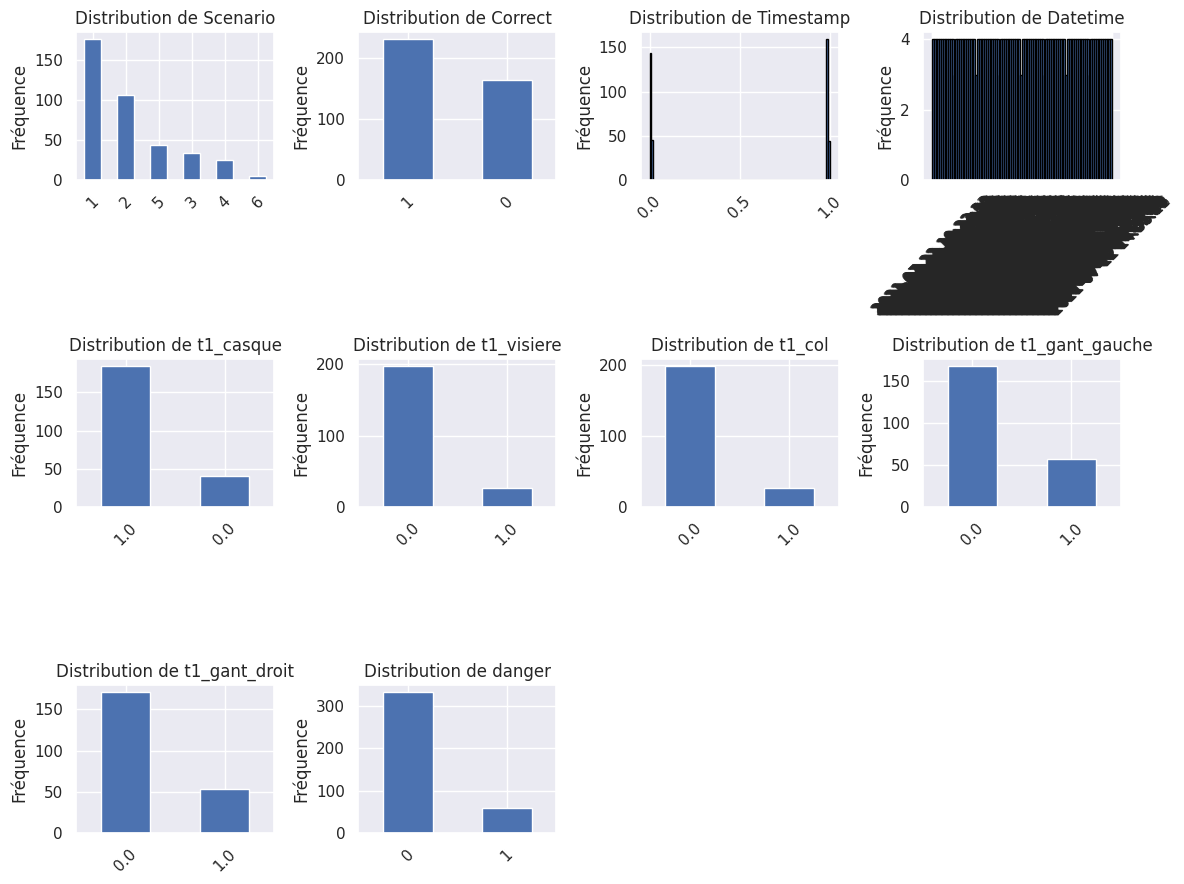

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_distributions(dataframe):
    nRow, nCol = dataframe.shape
    columnNames = dataframe.columns
    nGraphRow = (nCol + 3) // 4  # jusqu'à 4 graphiques par ligne

    plt.figure(figsize=(12, 3 * nGraphRow), dpi=100)

    for i, col in enumerate(columnNames):
        plt.subplot(nGraphRow, 4, i + 1)

        if col in ['Timestamp', 'Datetime', 'duree_eta']:

            df1[col].hist(bins=100, edgecolor='black')
        else:
            # Tracer un diagramme à barres pour les autres colonnes
            value_counts = dataframe[col].value_counts()
            value_counts.plot(kind='bar')

        plt.xticks(rotation=45)
        plt.ylabel('Fréquence')
        plt.title(f'Distribution de {col}')

    plt.tight_layout()
    plt.savefig('mon_graphique.png')
    plt.show()

# Utilisez cette fonction pour tracer les distributions pour df1
plot_distributions(df1)



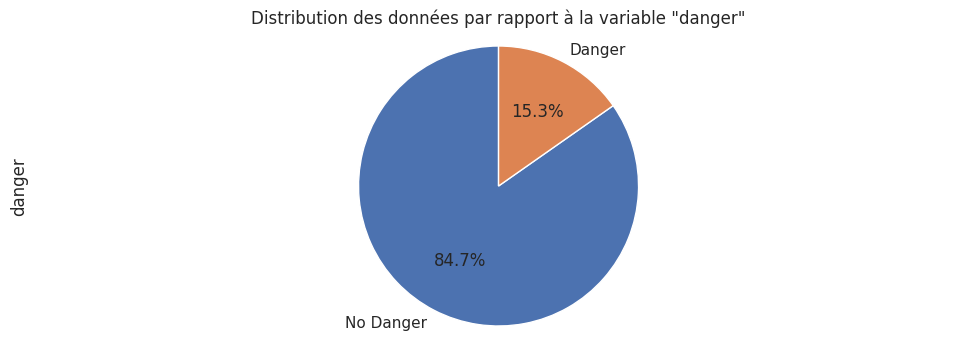

In [16]:
import matplotlib.pyplot as plt

# Utilisez votre dataframe pour le technicien 1 (remplacez df_technicien1 par le nom de votre dataframe)
df1['danger'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Danger', 'Danger'])
plt.title('Distribution des données par rapport à la variable "danger"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


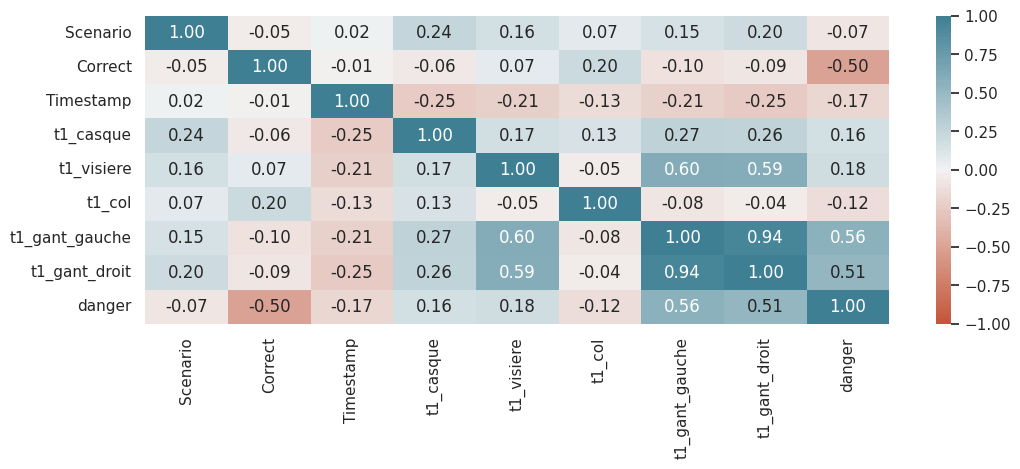

In [17]:
cmap_corr = sns.diverging_palette(20, 220, n=200)
sns.heatmap(df1[features_num1].corr(), vmin=-1, vmax=1, cmap=cmap_corr, annot=True, fmt='.2f');

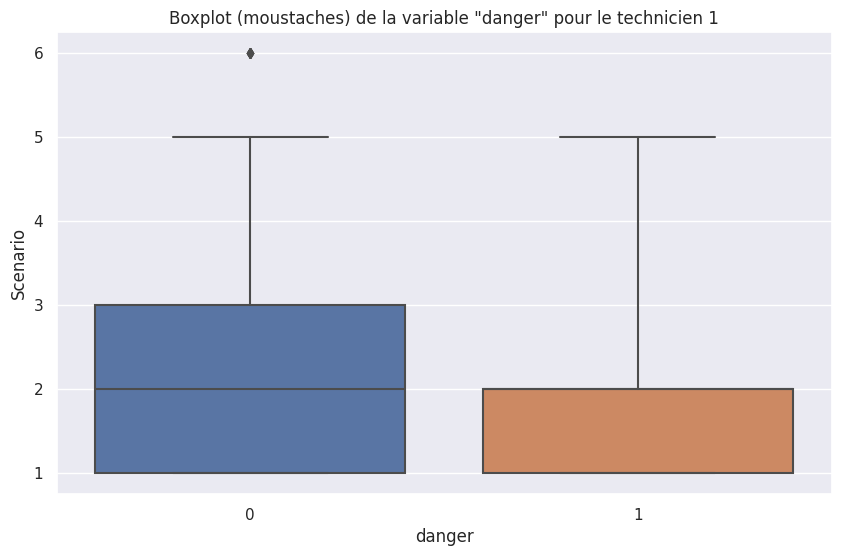

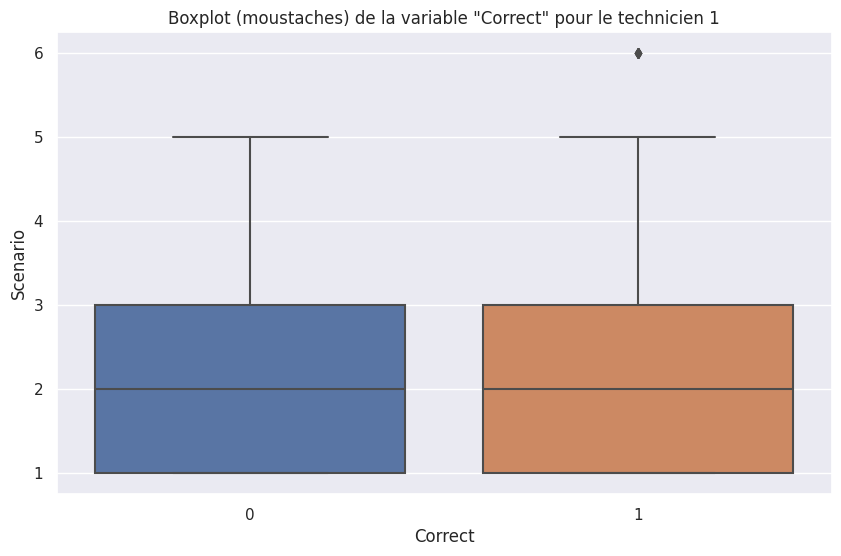

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Créez un boxplot avec des moustaches pour la variable 'danger'
plt.figure(figsize=(10, 6))
sns.boxplot(y='Scenario', x='danger', data=df1, whis=[5, 95])  # Utilisez des pourcentages de votre choix
plt.title('Boxplot (moustaches) de la variable "danger" pour le technicien 1')
plt.show()

# Créez un boxplot avec des moustaches pour la variable 'Correct'
plt.figure(figsize=(10, 6))
sns.boxplot(y='Scenario', x='Correct', data=df1, whis=[5, 95])  # Utilisez des pourcentages de votre choix
plt.title('Boxplot (moustaches) de la variable "Correct" pour le technicien 1')
plt.show()




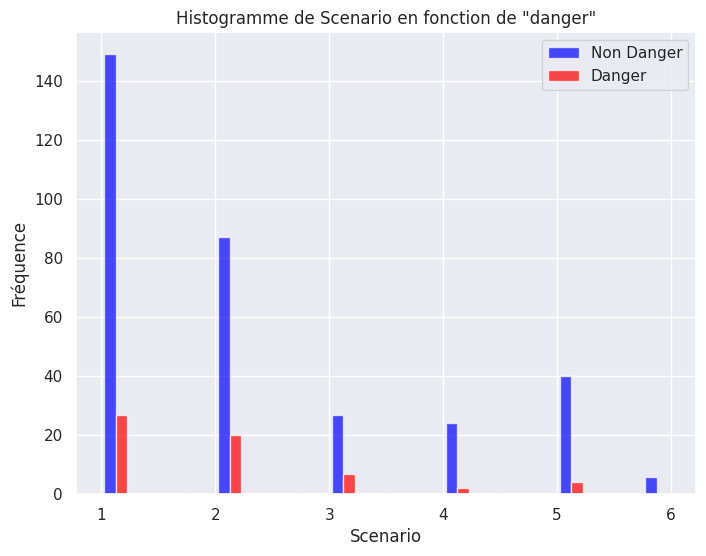

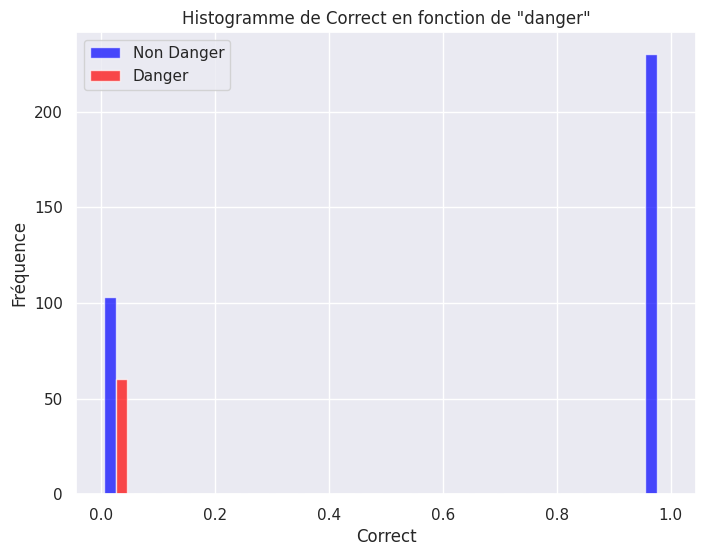

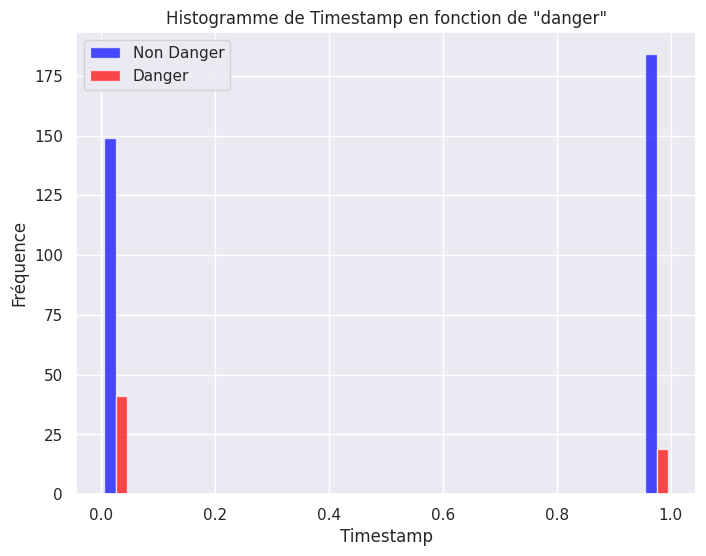

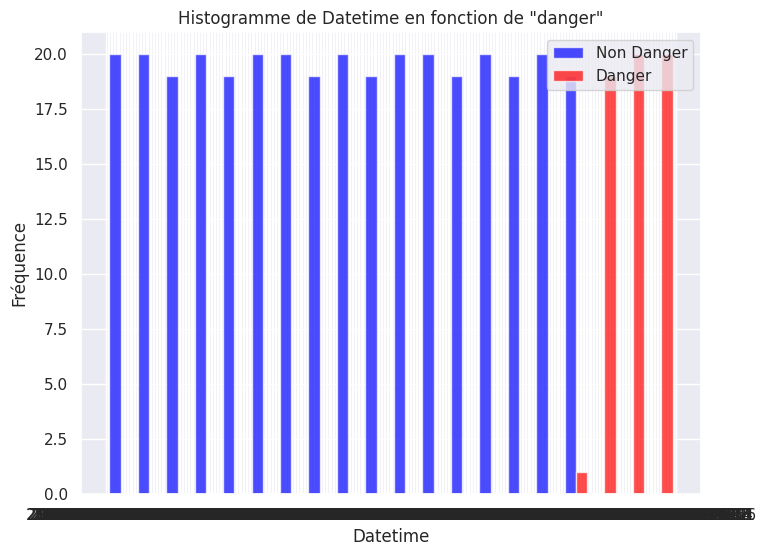

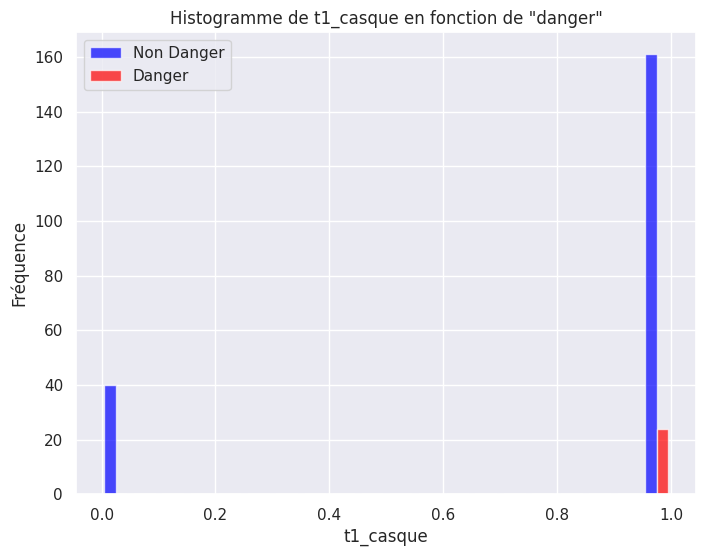

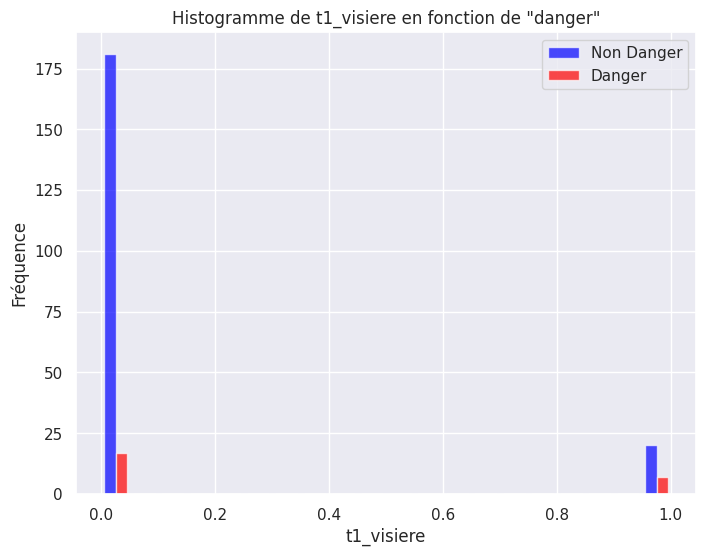

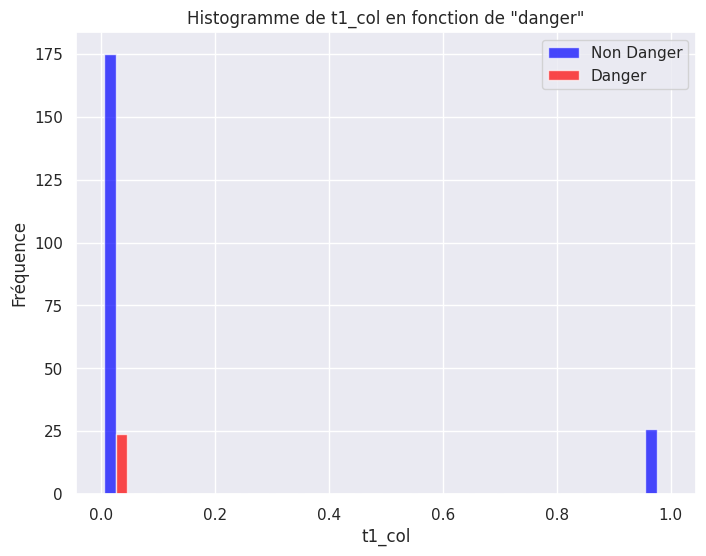

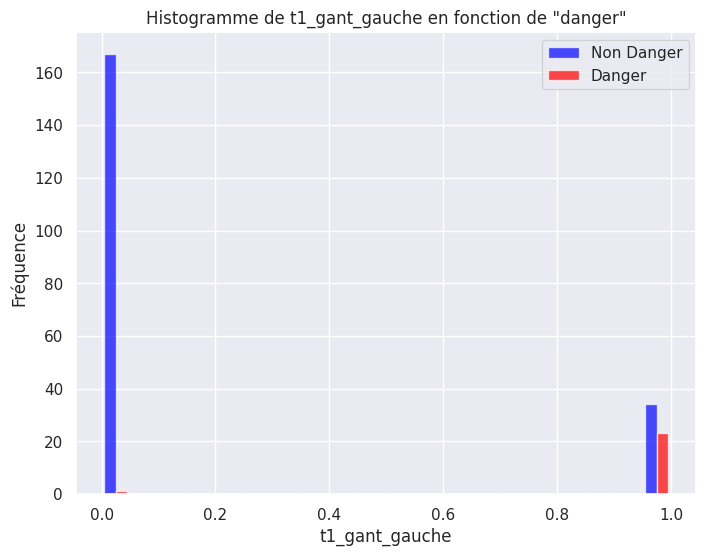

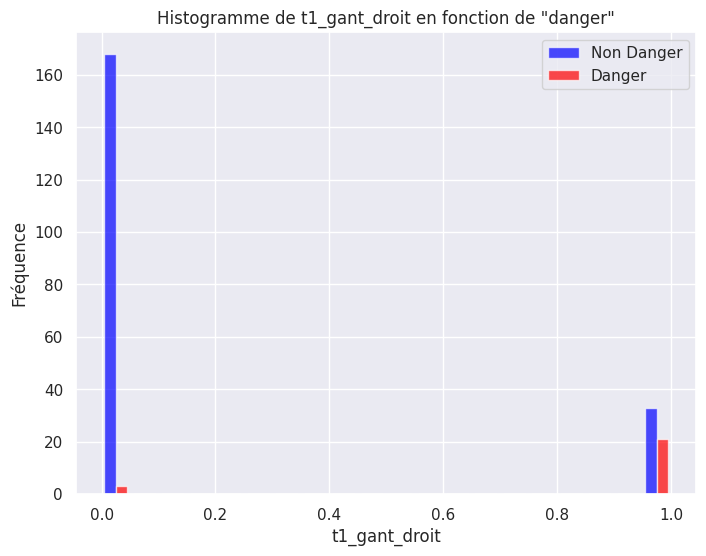

In [19]:
# Affichez des histogrammes pour chaque variable en fonction de 'danger'
for column in df1.columns[:-1]:  # Excluez la variable cible 'danger'
    plt.figure(figsize=(8, 6))
    plt.hist([df1[column][df1['danger'] == 0], df1[column][df1['danger'] == 1]], bins=20, label=['Non Danger', 'Danger'], alpha=0.7, color=['blue', 'red'])
    plt.title(f'Histogramme de {column} en fonction de "danger"')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.legend()
    plt.show()

supprimer de valeurs NaN


In [20]:
# Supprimer les lignes contenant des valeurs NaN dans le DataFrame X_train
df1 = df1.dropna()

# Assurez-vous de réinitialiser l'index après la suppression des lignes
df1 = df1.reset_index(drop=True)

ajoute duree_etat


In [21]:
import pandas as pd


# Ajoutez une variable 'duree_etat' pour le technicien 1
df1['duree_etat'] = df1.groupby(['Scenario', 't1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit'])['Timestamp'].diff().fillna(pd.Timedelta(seconds=0))

# Ajout de la variable 'duree_etat' pour le technicien 2
df2['duree_etat'] = df2.groupby(['Scenario', 't2_casque', 't2_visiere', 't2_veste', 't2_col'])['Timestamp'].diff().fillna(pd.Timedelta(seconds=0))

# Convertir les entrées Timedelta en secondes
df1['duree_etat'] = df1['duree_etat'].apply(lambda x: x.total_seconds() if pd.api.types.is_timedelta64_dtype(x) else x)

df1['duree_etat'] = pd.to_numeric(df1['duree_etat'], errors='coerce')
# Remplacer les NaN par 0 dans la colonne 'duree_etat'
df1['duree_etat'] = df1['duree_etat'].fillna(0)

# Si vous souhaitez remplacer les NaN par 0 dans tout le DataFrame
df1 = df1.fillna(0)

# Convertir les entrées Timedelta en secondes
df2['duree_etat'] = df2['duree_etat'].apply(lambda x: x.total_seconds() if pd.api.types.is_timedelta64_dtype(x) else x)

df2['duree_etat'] = pd.to_numeric(df2['duree_etat'], errors='coerce')
# Remplacer les NaN par 0 dans la colonne 'duree_etat'
df2['duree_etat'] = df2['duree_etat'].fillna(0)

# Si vous souhaitez remplacer les NaN par 0 dans tout le DataFrame
df2 = df2.fillna(0)

# Affichage des premières lignes des dataframes
print("Technicien 1:")
print(df1.head(20))

#print("\nTechnicien 2:")
#print(df2.head(20))

Technicien 1:
    Scenario  Correct  Timestamp             Datetime  t1_casque  t1_visiere  \
0          1        1   0.981346  2021-07-22 10:22:23        0.0         0.0   
1          1        1   0.981365  2021-07-22 10:22:39        0.0         0.0   
2          1        1   0.981382  2021-07-22 10:22:54        0.0         0.0   
3          1        1   0.981399  2021-07-22 10:23:09        0.0         0.0   
4          1        1   0.981417  2021-07-22 10:23:25        0.0         0.0   
5          1        1   0.981434  2021-07-22 10:23:40        1.0         0.0   
6          1        1   0.981452  2021-07-22 10:23:56        1.0         0.0   
7          1        1   0.981469  2021-07-22 10:24:11        1.0         0.0   
8          1        1   0.981486  2021-07-22 10:24:26        1.0         0.0   
9          1        1   0.981504  2021-07-22 10:24:42        1.0         0.0   
10         1        1   0.981521  2021-07-22 10:24:57        1.0         0.0   
11         1        1   0.

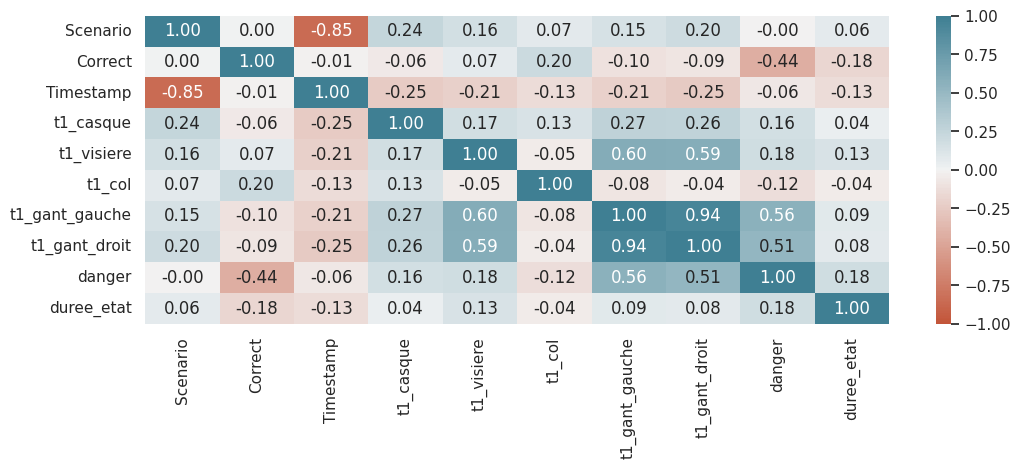

In [22]:

features_num1 = df1.columns[df1.dtypes != object].tolist()
features_cat1 = df1.columns[df1.dtypes == object].tolist()
cmap_corr = sns.diverging_palette(20, 220, n=200)
sns.heatmap(df1[features_num1].corr(), vmin=-1, vmax=1, cmap=cmap_corr, annot=True, fmt='.2f');

normalisation

In [23]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named df with 'danger' column

# Separate features (X) and target variable (y)
X = df1.drop('danger', axis=1)
y = df1['danger']


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Remove the 'Datetime' column from X_train
X = X.drop('Datetime', axis=1)



# Supposons que X et y soient vos données
smote = SMOTE(random_state=0)

# Utilisez la méthode fit_resample sur l'objet SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Séparez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)





# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print(X_train)


Shape of X_train: (321, 9)
Shape of X_test: (81, 9)
Shape of y_train: (321,)
Shape of y_test: (81,)
     Scenario  Correct  Timestamp  t1_casque  t1_visiere  t1_col  \
18          1        1   0.981661        1.0    0.000000     0.0   
203         4        1   0.016835        1.0    1.000000     0.0   
351         3        0   0.017338        1.0    0.371018     0.0   
275         1        0   0.983683        1.0    0.000000     0.0   
63          1        1   0.982447        0.0    0.000000     0.0   
..        ...      ...        ...        ...         ...     ...   
71          2        1   0.982808        1.0    0.000000     1.0   
106         1        0   0.983511        1.0    0.000000     0.0   
270         1        0   0.983663        1.0    0.000000     0.0   
348         2        0   0.613456        1.0    1.000000     0.0   
102         1        0   0.983441        1.0    0.000000     0.0   

     t1_gant_gauche  t1_gant_droit  duree_etat  
18              0.0            0.0

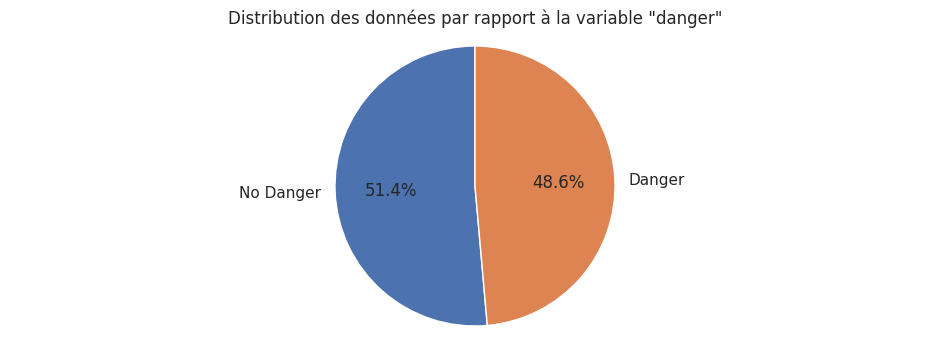

In [24]:
import matplotlib.pyplot as plt

# Assurez-vous que y_train2 est une série contenant les valeurs de danger
# y_train2 doit être la colonne 'danger' de votre DataFrame d'entraînement

# Calculer les effectifs de chaque catégorie
danger_counts = y_train.value_counts()

# Tracer le diagramme en secteurs
danger_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Danger', 'Danger'])
plt.title('Distribution des données par rapport à la variable "danger"')
plt.ylabel('')  # Pour enlever le label de l'axe y
plt.axis('equal')  # Assure que le diagramme est circulaire
plt.show()


model


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [26]:
print(X_train.isnull().sum())

Scenario          0
Correct           0
Timestamp         0
t1_casque         0
t1_visiere        0
t1_col            0
t1_gant_gauche    0
t1_gant_droit     0
duree_etat        0
dtype: int64


Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Assuming you have already defined iso_forest

# Convert 'Timedelta' to numeric representation in X_train
#X_train['duree_etat_seconds'] = pd.to_timedelta(X_train['duree_etat'])
#X_train['duree_etat_seconds'] = X_train['duree_etat_seconds'].dt.total_seconds()

# Convert 'Timedelta' to numeric representation in X_test
#X_test['duree_etat_seconds'] = pd.to_timedelta(X_test['duree_etat'])
#X_test['duree_etat_seconds'] = X_test['duree_etat_seconds'].dt.total_seconds()


from sklearn.ensemble import IsolationForest

# Exemple d'ajustement des hyperparamètres
iso_forest = IsolationForest(n_estimators=100, contamination=0.05)
iso_forest.fit(X_train)


# Now, you can proceed to fit the Isolation Forest model
iso_forest.fit(X_train)
y_pred_iso_forest = iso_forest.predict(X_test)

# Check for null values in X_train
print(X_train.isnull().sum())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Scenario          0
Correct           0
Timestamp         0
t1_casque         0
t1_visiere        0
t1_col            0
t1_gant_gauche    0
t1_gant_droit     0
duree_etat        0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Matrice de confusion - Isolation Forest:
[[ 0  0  0]
 [ 4  0 41]
 [ 1  0 35]]


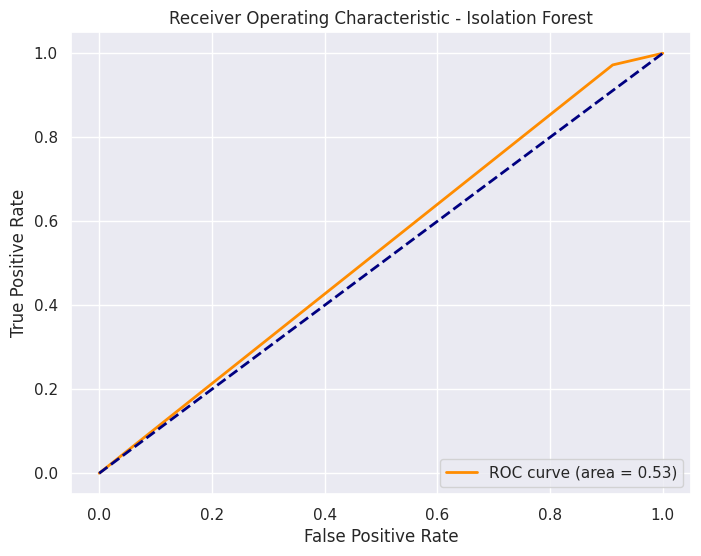

In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already defined y_test and y_pred_iso_forest

# Calculer la matrice de confusion pour le modèle Isolation Forest
cm_iso_forest = confusion_matrix(y_test, y_pred_iso_forest)

# Calculer la courbe ROC pour le modèle Isolation Forest
fpr_iso_forest, tpr_iso_forest, _ = roc_curve(y_test, y_pred_iso_forest)
roc_auc_iso_forest = auc(fpr_iso_forest, tpr_iso_forest)

# Afficher la matrice de confusion pour le modèle Isolation Forest
print("Matrice de confusion - Isolation Forest:")
print(cm_iso_forest)

# Afficher la courbe ROC pour le modèle Isolation Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_iso_forest, tpr_iso_forest, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_iso_forest))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Isolation Forest')
plt.legend(loc='lower right')
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error



# Calculer le MSE
mse = mean_squared_error(y_test, y_pred_iso_forest)

print("Mean Squared Error (MSE): {:.2f}".format(mse))

Mean Squared Error (MSE): 0.60


Matrice de confusion - SVM:
[[ 0  0  0]
 [ 1  0 44]
 [ 0  0 36]]


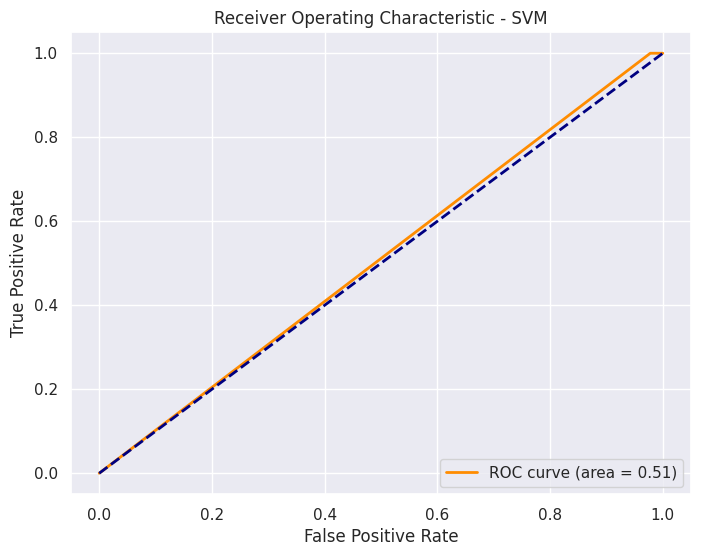

Mean Squared Error (MSE): 0.56


In [30]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Assuming you have X_train and y_test




# Create the One-Class SVM model
svm_model = OneClassSVM(nu=0.01)

# Fit the model on the training set
svm_model.fit(X_train)


# Predict anomalies on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate the confusion matrix for the SVM model
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Calculate the ROC curve for the SVM model
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Display the confusion matrix for the SVM model
print("Matrice de confusion - SVM:")
print(cm_svm)

# Display the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc='lower right')
plt.show()


# Calculer le MSE
mse = mean_squared_error(y_test,y_pred_svm)

print("Mean Squared Error (MSE): {:.2f}".format(mse))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
11/11 [==============================] - 1s 5ms/step - loss: 0.5949 - accuracy: 0.3264
Epoch 2/25
11/11 [==============================] - 0s 5ms/step - loss: 0.5897 - accuracy: 0.3319
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 0.5856 - accuracy:

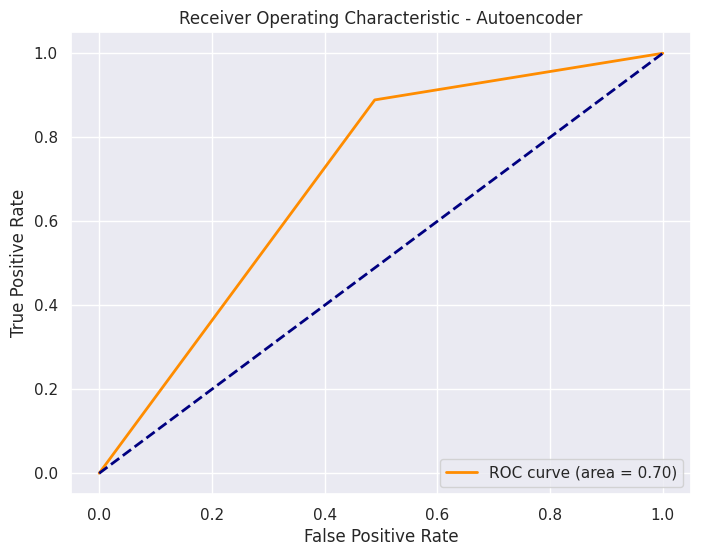

Mean Squared Error (MSE): 0.32


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définir le modèle (c'est un exemple générique, ajustez-le selon vos besoins)
model = Sequential()
num_features = 9
# Ajouter des couches au modèle
model.add(Dense(64, activation='relu', input_shape=(num_features,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle avec un optimiseur, une fonction de perte et des métriques
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, X_train, epochs=25, batch_size=32, shuffle=True)

# Prédire les anomalies sur l'ensemble de test
y_pred_autoencoder = model.predict(X_test)

# Set a threshold to convert continuous predictions to binary labels
threshold = 0.5
y_pred_autoencoder_binary = [1 if x.mean() >= threshold else 0 for x in y_pred_autoencoder]
print(np.shape(y_pred_autoencoder_binary))
# Calculate the confusion matrix for the autoencoder model
cm_autoencoder = confusion_matrix(y_test, y_pred_autoencoder_binary)

# Calculate the ROC curve for the autoencoder model
fpr_autoencoder, tpr_autoencoder, _ = roc_curve(y_test, y_pred_autoencoder_binary)
roc_auc_autoencoder = auc(fpr_autoencoder, tpr_autoencoder)

# Display the confusion matrix for the autoencoder model
print("Matrice de confusion - Autoencodeur:")
print(cm_autoencoder)

# Display the ROC curve for the autoencoder model
plt.figure(figsize=(8, 6))
plt.plot(fpr_autoencoder, tpr_autoencoder, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_autoencoder))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Autoencoder')
plt.legend(loc='lower right')
plt.show()




# Calculer le MSE
mse = mean_squared_error(y_test, y_pred_autoencoder_binary)

print("Mean Squared Error (MSE): {:.2f}".format(mse))

In [32]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(neurons=64):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(num_features,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model


In [34]:
best_score = 0
best_params = {}

for neurons in [64, 128]:
    for batch_size in [32, 64, 128]:
        for epochs in [20, 30, 50]:
            model = create_model(neurons=neurons)
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
            score = model.evaluate(X_test, y_test, verbose=0)
            if score[1] > best_score:  # Assuming score[1] is accuracy
                best_score = score[1]
                best_params = {'neurons': neurons, 'batch_size': batch_size, 'epochs': epochs}

print("Meilleur score : ", best_score)
print("Meilleurs paramètres : ", best_params)


Meilleur score :  1.0
Meilleurs paramètres :  {'neurons': 64, 'batch_size': 32, 'epochs': 20}


In [35]:
pip install -q -U keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.6 MB/s eta 0:00:00


In [36]:
import kerastuner as kt

def model_builder(hp):
    model = Sequential()
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    hp_epochs = hp.Int('epochs', min_value=10, max_value=50, step=10)
    model.add(Dense(units=hp_units, activation='relu', input_shape=(num_features,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 30 Complete [00h 00m 04s]
val_accuracy: 0.9259259104728699

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 46s


In [37]:
best_hyperparameters = tuner.get_best_hyperparameters()[0]
print("Meilleurs hyperparamètres trouvés : ", best_hyperparameters.values)


Meilleurs hyperparamètres trouvés :  {'units': 256, 'epochs': 10, 'learning_rate': 0.01, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


In [38]:
best_model = tuner.hypermodel.build(best_hyperparameters)
best_model.fit(X_train, y_train, epochs=best_hyperparameters.values['epochs'], validation_data=(X_test, y_test))


Epoch 1/10
11/11 [==============================] - 2s 38ms/step - loss: 0.1306 - accuracy: 0.8100 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 2/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0178 - accuracy: 0.9782 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0157 - accuracy: 0.9844 - val_loss: 4.0830e-05 - val_accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - 0s 24ms/step - loss: 0.0126 - accuracy: 0.9875 - val_loss: 7.9500e-05 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0125 - accuracy: 0.9875 - val_loss: 4.1512e-05 - val_accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 0s 16ms/step - loss: 0.0125 - accuracy: 0.9875 - val_loss: 1.9196e-05 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.9875 - val_loss: 1.8114e-05 - val_accuracy: 1

In [39]:
eval_result = best_model.evaluate(X_test, y_test)
print("[Test Loss, Test Accuracy]:", eval_result)


3/3 [==============================] - 0s 7ms/step - loss: 1.4306e-05 - accuracy: 1.0000
[Test Loss, Test Accuracy]: [1.4305756849353202e-05, 1.0]


In [40]:
best_model.save('mon_modele_optimise.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 4ms/step
(81, 1)
Matrice de confusion - Autoencodeur:
[[45  0]
 [ 0 36]]
3/3 [==============================] - 0s 5ms/step


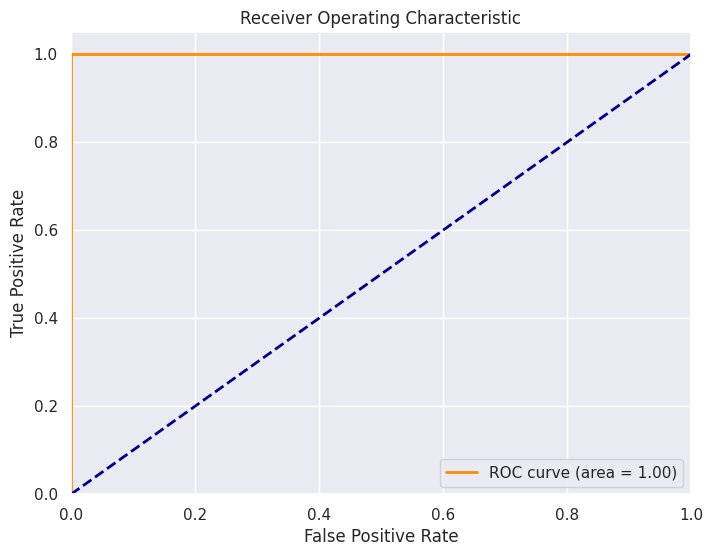

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Calculate the confusion matrix for the autoencoder model
# Convert predictions to binary labels based on a threshold
threshold = 0.5  # You can adjust this threshold based on your needs
y_pred_binary = np.where(model.predict(X_test) > threshold, 1, 0)
cm_autoencoder = confusion_matrix(y_test, y_pred_binary)

print(np.shape(y_pred_binary))

# Display the confusion matrix for the autoencoder model
print("Matrice de confusion - Autoencodeur:")
print(cm_autoencoder)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Seuillage pour obtenir des étiquettes de classe binaires
y_pred = (model.predict(X_test) > 0.5).astype("int32")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


3/3 [==============================] - 0s 6ms/step
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [43]:
# Matrice de confusion
conf_matrix = np.array([[10, 27], [0, 8]])

# Extraire les éléments de la matrice de confusion
tp = conf_matrix[1, 1]  # Vrais Positifs
fp = conf_matrix[0, 1]  # Faux Positifs
fn = conf_matrix[1, 0]  # Faux Négatifs

# Calculer la précision
precision = tp / (tp + fp) if (tp + fp) > 0 else 0

# Calculer le rappel
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# Calculer le F1-score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Afficher les résultats
print("Précision: {:.2f}".format(precision))
print("Rappel: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))


Précision: 0.23
Rappel: 1.00
F1-score: 0.37


**tech2222222222222222222222222222222**

In [44]:

features_num2 = df2.columns[df2.dtypes != object].tolist()
features_cat2 = df2.columns[df2.dtypes == object].tolist()

print(f'Numerical features for Technicien 1: {features_num2}')
print(f'Categorical features for Technicien 1: {features_cat2}')
#df1 = df1.dropna()

Numerical features for Technicien 1: ['Scenario', 'Correct', 'Timestamp', 't2_casque', 't2_visiere', 't2_veste', 't2_col', 'danger', 'duree_etat']
Categorical features for Technicien 1: ['Datetime']


In [45]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

timestamp_values = df2['Timestamp'].values.reshape(-1, 1)

# Normalisation Min-Max
scaler = MinMaxScaler()
timestamp_normalized = scaler.fit_transform(timestamp_values)

# Remplacez les valeurs d'origine par les valeurs normalisées dans le DataFrame
df2['Timestamp'] = timestamp_normalized

# Examinez les résultats
print(df2.head())


   Scenario  Correct  Timestamp             Datetime  t2_casque  t2_visiere  \
0         1        1   0.981346  2021-07-22 10:22:23        0.0         0.0   
1         1        1   0.981365  2021-07-22 10:22:39        0.0         0.0   
2         1        1   0.981382  2021-07-22 10:22:54        0.0         0.0   
3         1        1   0.981399  2021-07-22 10:23:09        0.0         0.0   
4         1        1   0.981417  2021-07-22 10:23:25        0.0         0.0   

   t2_veste  t2_col  danger  duree_etat  
0       0.0     0.0       0         0.0  
1       0.0     0.0       0         0.0  
2       0.0     0.0       0         0.0  
3       0.0     0.0       0         0.0  
4       0.0     0.0       0         0.0  


In [46]:
# Supprimer les lignes contenant des valeurs NaN dans le DataFrame X_train
df2 = df2.dropna()

# Assurez-vous de réinitialiser l'index après la suppression des lignes
df2 = df2.reset_index(drop=True)

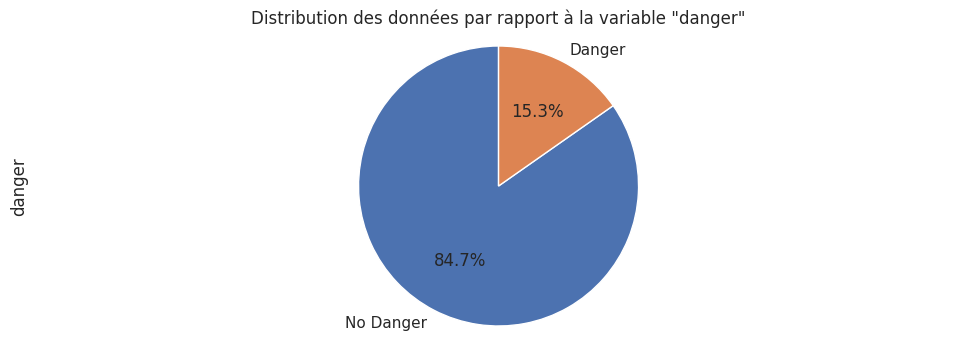

In [47]:
import matplotlib.pyplot as plt

# Utilisez votre dataframe pour le technicien 1 (remplacez df_technicien1 par le nom de votre dataframe)
df2['danger'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Danger', 'Danger'])
plt.title('Distribution des données par rapport à la variable "danger"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

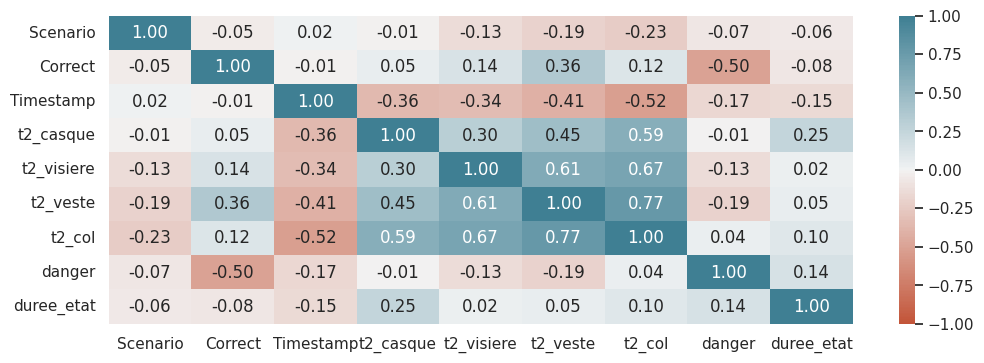

In [48]:
cmap_corr = sns.diverging_palette(20, 220, n=200)
sns.heatmap(df2[features_num2].corr(), vmin=-1, vmax=1, cmap=cmap_corr, annot=True, fmt='.2f');

In [49]:
from sklearn.model_selection import train_test_split



# Assuming you have a DataFrame named df with 'danger' column

# Separate features (X) and target variable (y)
X = df2.drop('danger', axis=1)
y = df2['danger']


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Remove the 'Datetime' column from X_train
X = X.drop('Datetime', axis=1)



# Supposons que X et y soient vos données
smote = SMOTE(random_state=0)

# Utilisez la méthode fit_resample sur l'objet SMOTE
X_resampled2, y_resampled2= smote.fit_resample(X, y)

# Séparez les données en ensembles d'entraînement et de test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=42)






# Print the shapes of the resulting sets
print("Shape of X_train:", X_train2.shape)
print("Shape of X_test:", X_test2.shape)
print("Shape of y_train:", y_train2.shape)
print("Shape of y_test:", y_test2.shape)
print(X_train)





Shape of X_train: (532, 8)
Shape of X_test: (134, 8)
Shape of y_train: (532,)
Shape of y_test: (134,)
     Scenario  Correct  Timestamp  t1_casque  t1_visiere  t1_col  \
18          1        1   0.981661        1.0    0.000000     0.0   
203         4        1   0.016835        1.0    1.000000     0.0   
351         3        0   0.017338        1.0    0.371018     0.0   
275         1        0   0.983683        1.0    0.000000     0.0   
63          1        1   0.982447        0.0    0.000000     0.0   
..        ...      ...        ...        ...         ...     ...   
71          2        1   0.982808        1.0    0.000000     1.0   
106         1        0   0.983511        1.0    0.000000     0.0   
270         1        0   0.983663        1.0    0.000000     0.0   
348         2        0   0.613456        1.0    1.000000     0.0   
102         1        0   0.983441        1.0    0.000000     0.0   

     t1_gant_gauche  t1_gant_droit  duree_etat  
18              0.0            0

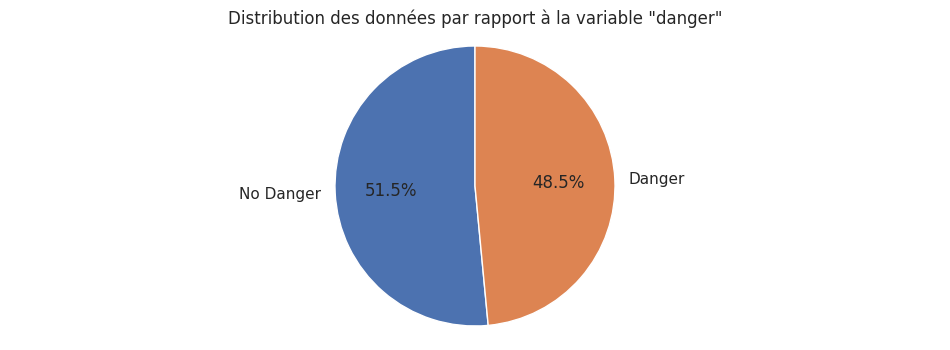

In [50]:
import matplotlib.pyplot as plt

# Assurez-vous que y_train2 est une série contenant les valeurs de danger
# y_train2 doit être la colonne 'danger' de votre DataFrame d'entraînement

# Calculer les effectifs de chaque catégorie
danger_counts = y_train2.value_counts()

# Tracer le diagramme en secteurs
danger_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Danger', 'Danger'])
plt.title('Distribution des données par rapport à la variable "danger"')
plt.ylabel('')  # Pour enlever le label de l'axe y
plt.axis('equal')  # Assure que le diagramme est circulaire
plt.show()


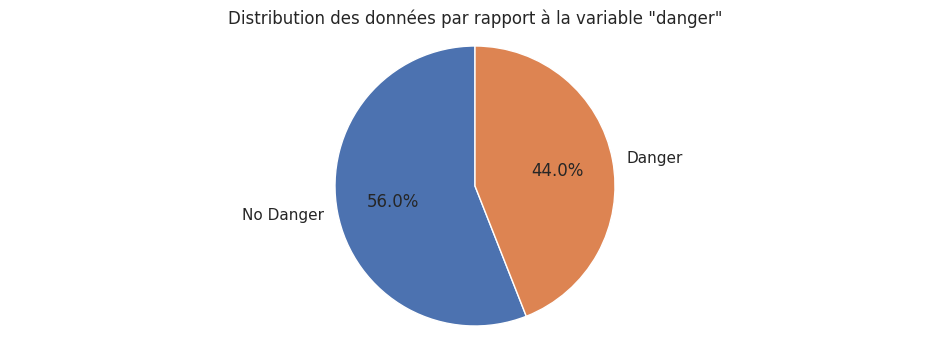

In [51]:
import matplotlib.pyplot as plt

# Assurez-vous que y_train2 est une série contenant les valeurs de danger
# y_train2 doit être la colonne 'danger' de votre DataFrame d'entraînement

# Calculer les effectifs de chaque catégorie
danger_counts = y_test2.value_counts()

# Tracer le diagramme en secteurs
danger_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Danger', 'Danger'])
plt.title('Distribution des données par rapport à la variable "danger"')
plt.ylabel('')  # Pour enlever le label de l'axe y
plt.axis('equal')  # Assure que le diagramme est circulaire
plt.show()


In [52]:
from sklearn.ensemble import IsolationForest
import pandas as pd



from sklearn.ensemble import IsolationForest

# Exemple d'ajustement des hyperparamètres
iso_forest2 = IsolationForest(n_estimators=100, contamination=0.05)
iso_forest2.fit(X_train2)


# Now, you can proceed to fit the Isolation Forest model
iso_forest2.fit(X_train2)
y_pred_iso_forest2 = iso_forest2.predict(X_test2)

# Check for null values in X_train
print(X_train2.isnull().sum())
print(np.shape(y_pred_iso_forest2))
print(np.shape(y_test2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Scenario      0
Correct       0
Timestamp     0
t2_casque     0
t2_visiere    0
t2_veste      0
t2_col        0
duree_etat    0
dtype: int64
(134,)
(134,)


Matrice de confusion - Isolation Forest:
[[ 0  0  0]
 [ 7  0 68]
 [ 0  0 59]]


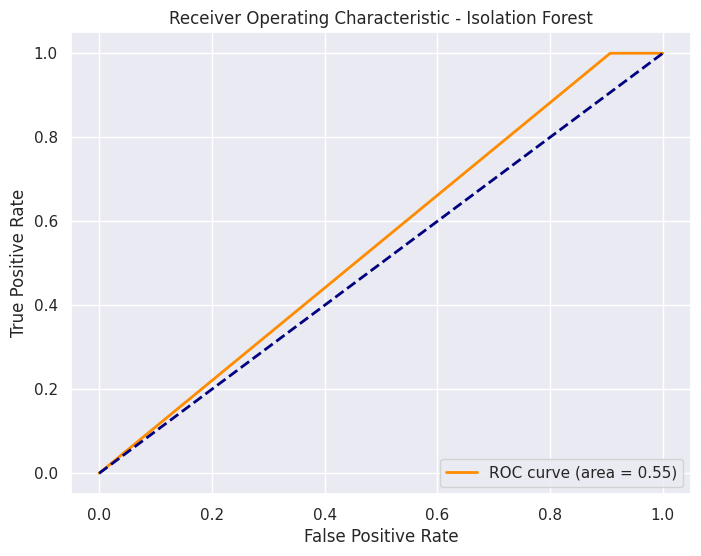

Mean Squared Error (MSE): 0.56
Recall (Sensibilité) - Isolation Forest: 0.0


In [53]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already defined y_test and y_pred_iso_forest

# Calculer la matrice de confusion pour le modèle Isolation Forest
cm_iso_forest2 = confusion_matrix(y_test2, y_pred_iso_forest2)

# Calculer la courbe ROC pour le modèle Isolation Forest
fpr_iso_forest2, tpr_iso_forest2, _ = roc_curve(y_test2, y_pred_iso_forest2)
roc_auc_iso_forest2 = auc(fpr_iso_forest2, tpr_iso_forest2)

# Afficher la matrice de confusion pour le modèle Isolation Forest
print("Matrice de confusion - Isolation Forest:")
print(cm_iso_forest2)

# Afficher la courbe ROC pour le modèle Isolation Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_iso_forest2, tpr_iso_forest2, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_iso_forest2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Isolation Forest')
plt.legend(loc='lower right')
plt.show()

# Calculer le MSE
mse = mean_squared_error(y_test2, y_pred_iso_forest2)
from sklearn.metrics import confusion_matrix, roc_curve, auc, recall_score, mean_squared_error
import matplotlib.pyplot as plt
print("Mean Squared Error (MSE): {:.2f}".format(mse))
# Extract elements from the confusion matrix
tn_iso_forest2, fp_iso_forest2, fn_iso_forest2, tp_iso_forest2 = cm_iso_forest2[0, 0], cm_iso_forest2[0, 1], cm_iso_forest2[1, 0], cm_iso_forest2[1, 1]

# Calculate recall from the confusion matrix
recall_iso_forest2 = tp_iso_forest2 / (tp_iso_forest2 + fn_iso_forest2)

# Print the recall
print("Recall (Sensibilité) - Isolation Forest:", recall_iso_forest2)


Matrice de confusion - SVM:
[[ 0  0  0]
 [ 0  0 75]
 [ 2  0 57]]


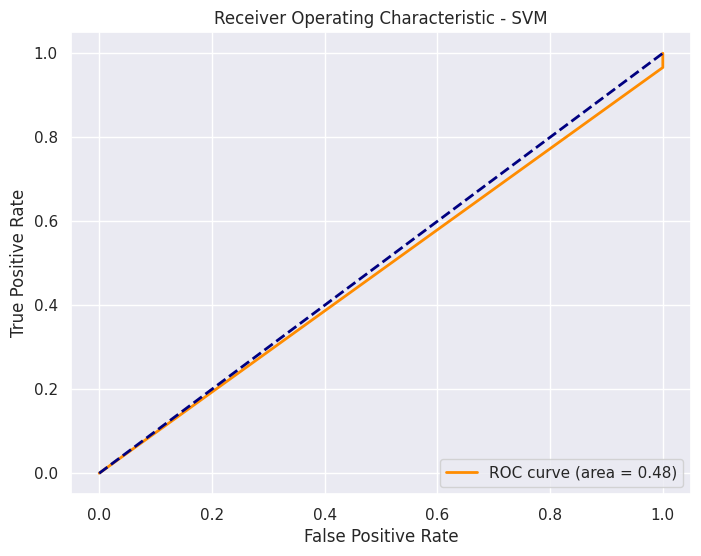

Mean Squared Error (MSE): 0.62


In [54]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Assuming you have X_train and y_test




# Create the One-Class SVM model
svm_model = OneClassSVM(nu=0.01)

# Fit the model on the training set
svm_model.fit(X_train2)


# Predict anomalies on the test set
y_pred_svm = svm_model.predict(X_test2)

# Calculate the confusion matrix for the SVM model
cm_svm = confusion_matrix(y_test2, y_pred_svm)

# Calculate the ROC curve for the SVM model
fpr_svm, tpr_svm, _ = roc_curve(y_test2, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Display the confusion matrix for the SVM model
print("Matrice de confusion - SVM:")
print(cm_svm)

# Display the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc='lower right')
plt.show()


# Calculer le MSE
mse = mean_squared_error(y_test2,y_pred_svm)

print("Mean Squared Error (MSE): {:.2f}".format(mse))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
17/17 [==============================] - 2s 8ms/step - loss: 9288.3125 - accuracy: 0.2220
Epoch 2/15
17/17 [==============================] - 0s 10ms/step - loss: 9288.2998 - accuracy: 0.4807
Epoch 3/15
17/17 [==============================] - 0s 10ms/step - loss: 9288.294

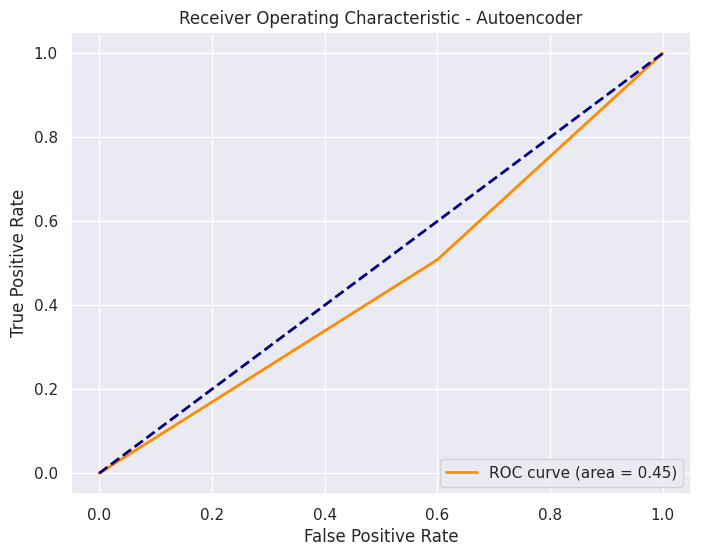

Mean Squared Error (MSE): 0.55


In [55]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ... (votre code précédent pour définir X_train2, X_test2, y_test2)

# Définir le modèle (c'est un exemple générique, ajustez-le selon vos besoins)
model_2 = Sequential()
num_features = 8
# Ajouter des couches au modèle
model_2.add(Dense(64, activation='relu', input_shape=(num_features,)))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# Compiler le modèle avec un optimiseur, une fonction de perte et des métriques
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Afficher un résumé du modèle
model_2.summary()

# Entraîner le modèle sur l'ensemble d'entraînement
model_2.fit(X_train2, X_train2, epochs=15, batch_size=32, shuffle=True)

# Prédire les anomalies sur l'ensemble de test
y_pred_autoencoder2 = model_2.predict(X_test2)

# Set a threshold to convert continuous predictions to binary labels
threshold = 0.5
y_pred_autoencoder_binary2 = [1 if x.mean() >= threshold else 0 for x in y_pred_autoencoder2]

# Calculate the confusion matrix for the autoencoder model
cm_autoencoder = confusion_matrix(y_test2, y_pred_autoencoder_binary2)

# Calculate the ROC curve for the autoencoder model
fpr_autoencoder, tpr_autoencoder, _ = roc_curve(y_test2, y_pred_autoencoder_binary2)
roc_auc_autoencoder = auc(fpr_autoencoder, tpr_autoencoder)

# Display the confusion matrix for the autoencoder model
print("Matrice de confusion - Autoencodeur:")
print(cm_autoencoder)

# Display the ROC curve for the autoencoder model
plt.figure(figsize=(8, 6))
plt.plot(fpr_autoencoder, tpr_autoencoder, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_autoencoder))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Autoencoder')
plt.legend(loc='lower right')
plt.show()



# Calculer le MSE
mse = mean_squared_error(y_test2, y_pred_autoencoder_binary2)

print("Mean Squared Error (MSE): {:.2f}".format(mse))

In [56]:
import kerastuner as kt

def model_builder(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(num_features,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

tuner.search(X_train2, y_train2, epochs=50, validation_data=(X_test2, y_test2))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [57]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_2.fit(X_train2, y_train2, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test2, y_test2), callbacks=[early_stopping])


Epoch 1/100
17/17 [==============================] - 3s 37ms/step - loss: 0.3242 - accuracy: 0.5489 - val_loss: 0.3070 - val_accuracy: 0.5970
Epoch 2/100
17/17 [==============================] - 0s 16ms/step - loss: 0.2915 - accuracy: 0.5940 - val_loss: 0.2853 - val_accuracy: 0.6642
Epoch 3/100
17/17 [==============================] - 0s 17ms/step - loss: 0.2743 - accuracy: 0.6598 - val_loss: 0.2700 - val_accuracy: 0.6791
Epoch 4/100
17/17 [==============================] - 0s 16ms/step - loss: 0.2539 - accuracy: 0.6447 - val_loss: 0.1912 - val_accuracy: 0.6269
Epoch 5/100
17/17 [==============================] - 0s 21ms/step - loss: 0.2433 - accuracy: 0.7237 - val_loss: 0.2504 - val_accuracy: 0.7313
Epoch 6/100
17/17 [==============================] - 0s 26ms/step - loss: 0.2436 - accuracy: 0.7350 - val_loss: 0.2455 - val_accuracy: 0.7313
Epoch 7/100
17/17 [==============================] - 0s 15ms/step - loss: 0.2399 - accuracy: 0.7406 - val_loss: 0.2431 - val_accuracy: 0.7313
Epoch 

In [58]:
import numpy as np
from sklearn.metrics import recall_score

# Prédire les étiquettes de classe sur l'ensemble de test
y_pred = model_2.predict(X_test2)
y_pred = (y_pred> 0.5).astype("int32")
print(np.shape(y_pred))

5/5 [==============================] - 0s 5ms/step
(134, 1)


In [60]:
recall = recall_score(y_test2, y_pred)
print("Recall:", recall)


Recall: 0.9322033898305084


In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédire les probabilités pour l'ensemble de test
y_pred_prob = model_2.predict(X_test2).ravel()

# Calculer les taux de faux et vrais positifs à différents seuils
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_prob)


5/5 [==============================] - 0s 7ms/step


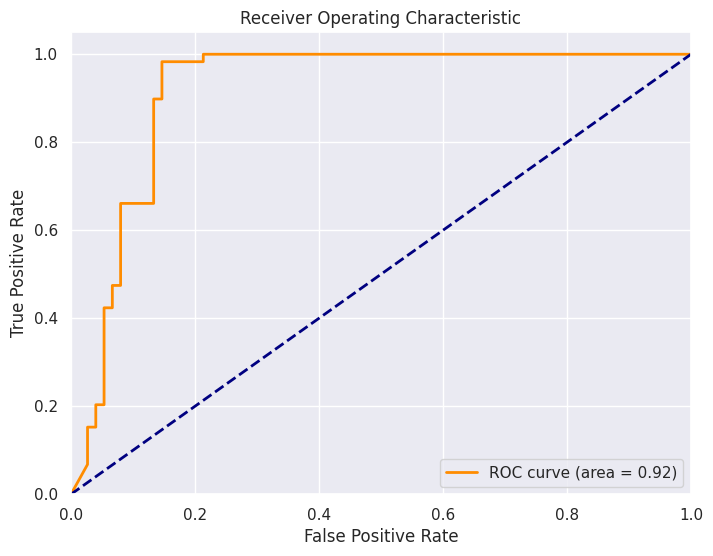

5/5 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.10


In [62]:
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
# Prédire les probabilités pour l'ensemble de test
y_pred_prob = model_2.predict(X_test2).ravel()

# Calculer le MSE
mse = mean_squared_error(y_test2, y_pred_prob)
print("Mean Squared Error (MSE): {:.2f}".format(mse))


fusion